# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from curtis_api_keys import weather_api_key
from curtis_api_keys import nrel_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (25, 50)
lng_range = (-70, -130)
print(nrel_key)

9bH6FAyLRnkdgVWfFiNbIhFhULWAJOc6n7cOe3pE


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


1350

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        returned_city.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")
        missing+=1
        print(f'City {city} not found. Skipping, total not found = {missing}')
    if count+missing >=1000:
        break
    
#     time.sleep(2)
      

Processing Recored 1 of 1350 | red bluff
Processing Recored 2 of 1350 | guerrero negro
Processing Recored 3 of 1350 | yakima
Processing Recored 4 of 1350 | la sarre
Processing Recored 5 of 1350 | pekin
Processing Recored 6 of 1350 | danville
Processing Recored 7 of 1350 | rock springs
Processing Recored 8 of 1350 | bridge city
Processing Recored 9 of 1350 | suamico
Processing Recored 10 of 1350 | sterling
Processing Recored 11 of 1350 | hot springs
Processing Recored 12 of 1350 | slidell
Processing Recored 13 of 1350 | huntingdon
Processing Recored 14 of 1350 | santa catarina de tepehuanes
Processing Recored 15 of 1350 | marshall
Processing Recored 16 of 1350 | middlebury
Processing Recored 17 of 1350 | lompoc
Processing Recored 18 of 1350 | mantua
Processing Recored 19 of 1350 | rodeo
Processing Recored 20 of 1350 | sinaloa
Processing Recored 21 of 1350 | sheridan
Processing Recored 22 of 1350 | channahon
Processing Recored 23 of 1350 | petersburg
Processing Recored 24 of 1350 | boone

Processing Recored 194 of 1350 | muskogee
Processing Recored 195 of 1350 | belle glade
Processing Recored 196 of 1350 | belle fourche
Processing Recored 197 of 1350 | hopkinsville
Processing Recored 198 of 1350 | altona
Processing Recored 199 of 1350 | wiarton
Processing Recored 200 of 1350 | yucca valley
Processing Recored 201 of 1350 | pineville
Processing Recored 202 of 1350 | paris
Processing Recored 203 of 1350 | del rio
Processing Recored 204 of 1350 | bradford
Processing Recored 205 of 1350 | rancho palos verdes
Processing Recored 206 of 1350 | sioux lookout
Processing Recored 207 of 1350 | mill valley
Processing Recored 208 of 1350 | brigantine
Processing Recored 209 of 1350 | cabot
Processing Recored 210 of 1350 | painesville
Processing Recored 211 of 1350 | carnduff
Processing Recored 212 of 1350 | silver city
Processing Recored 213 of 1350 | casper
Processing Recored 214 of 1350 | tooele
Processing Recored 215 of 1350 | pine hill
Processing Recored 216 of 1350 | hurricane
Pr

Processing Recored 384 of 1350 | warrensburg
Processing Recored 385 of 1350 | grants pass
Processing Recored 386 of 1350 | santa fe
City dolbeau not found. Skipping, total not found = 4
Processing Recored 387 of 1350 | milford
Processing Recored 388 of 1350 | bon air
Processing Recored 389 of 1350 | winnemucca
City acuna not found. Skipping, total not found = 5
Processing Recored 390 of 1350 | weare
Processing Recored 391 of 1350 | merced
Processing Recored 392 of 1350 | lafayette
Processing Recored 393 of 1350 | west lafayette
Processing Recored 394 of 1350 | susanville
Processing Recored 395 of 1350 | san felipe
Processing Recored 396 of 1350 | guerrero
Processing Recored 397 of 1350 | preston
Processing Recored 398 of 1350 | clinton
Processing Recored 399 of 1350 | haines city
Processing Recored 400 of 1350 | kanata
Processing Recored 401 of 1350 | opelika
Processing Recored 402 of 1350 | rolla
Processing Recored 403 of 1350 | dunn
Processing Recored 404 of 1350 | bay city
Processin

Processing Recored 570 of 1350 | conneaut
Processing Recored 571 of 1350 | cumberland
Processing Recored 572 of 1350 | deep river
Processing Recored 573 of 1350 | west odessa
Processing Recored 574 of 1350 | cedar falls
Processing Recored 575 of 1350 | dubuque
Processing Recored 576 of 1350 | astoria
Processing Recored 577 of 1350 | puerto palomas
Processing Recored 578 of 1350 | talladega
Processing Recored 579 of 1350 | ponca city
Processing Recored 580 of 1350 | mandeville
Processing Recored 581 of 1350 | ottumwa
Processing Recored 582 of 1350 | poplar bluff
Processing Recored 583 of 1350 | levelland
Processing Recored 584 of 1350 | blytheville
Processing Recored 585 of 1350 | panaba
Processing Recored 586 of 1350 | keokuk
Processing Recored 587 of 1350 | huntington
Processing Recored 588 of 1350 | grafton
Processing Recored 589 of 1350 | baton rouge
Processing Recored 590 of 1350 | hollins
Processing Recored 591 of 1350 | camden
Processing Recored 592 of 1350 | gainesville
Processi

Processing Recored 758 of 1350 | nampa
Processing Recored 759 of 1350 | lively
Processing Recored 760 of 1350 | blacksburg
Processing Recored 761 of 1350 | johnson city
Processing Recored 762 of 1350 | chickasha
Processing Recored 763 of 1350 | anderson
Processing Recored 764 of 1350 | holland
Processing Recored 765 of 1350 | rotterdam
Processing Recored 766 of 1350 | fort thomas
Processing Recored 767 of 1350 | kalispell
Processing Recored 768 of 1350 | monroe
Processing Recored 769 of 1350 | chippewa falls
Processing Recored 770 of 1350 | hibbing
Processing Recored 771 of 1350 | rancho cucamonga
Processing Recored 772 of 1350 | cananea
Processing Recored 773 of 1350 | seaside
Processing Recored 774 of 1350 | saint-ambroise
Processing Recored 775 of 1350 | rock falls
Processing Recored 776 of 1350 | polson
Processing Recored 777 of 1350 | worthington
Processing Recored 778 of 1350 | union
Processing Recored 779 of 1350 | cullman
Processing Recored 780 of 1350 | hutchinson
Processing R

Processing Recored 949 of 1350 | alamogordo
Processing Recored 950 of 1350 | eugene
Processing Recored 951 of 1350 | mattoon
Processing Recored 952 of 1350 | germantown
Processing Recored 953 of 1350 | logansport
Processing Recored 954 of 1350 | bartlett
Processing Recored 955 of 1350 | saint-jacques
Processing Recored 956 of 1350 | lakeway
Processing Recored 957 of 1350 | hammonton
Processing Recored 958 of 1350 | weatherford
Processing Recored 959 of 1350 | lock haven
Processing Recored 960 of 1350 | pitiquito
Processing Recored 961 of 1350 | mapimi
Processing Recored 962 of 1350 | midland
Processing Recored 963 of 1350 | naples
Processing Recored 964 of 1350 | lakeland
Processing Recored 965 of 1350 | highland springs
Processing Recored 966 of 1350 | greensboro
Processing Recored 967 of 1350 | ocean city
Processing Recored 968 of 1350 | martinsville
Processing Recored 969 of 1350 | bowling green
Processing Recored 970 of 1350 | boulder
Processing Recored 971 of 1350 | holly hill
Pro

In [5]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
# weather_data=weather_data.round(1)
weather_data.dtypes

City          object
Lat           object
Lng           object
Max_Temp      object
Humidity      object
Cloudiness    object
Wind_Speed    object
Country       object
Date          object
dtype: object

In [7]:
weather_data['Lat']=pd.to_numeric(weather_data['Lat'])
weather_data['Lng']=pd.to_numeric(weather_data['Lng'])
weather_data['Humidity']=pd.to_numeric(weather_data['Humidity'])
weather_data['Cloudiness']=pd.to_numeric(weather_data['Cloudiness'])
weather_data['Wind_Speed']=pd.to_numeric(weather_data['Wind_Speed'])
weather_data['Date']=pd.to_numeric(weather_data['Date'])
weather_data.to_csv('output_data/Exported_weather_data1.csv')
weather_data.describe()

,Lat,Lng,Humidity,Cloudiness,Wind_Speed,Date
count,990.000000,990.000000,990.000000,990.000000,990.000000,9.900000e+02
mean,37.402707,-87.005394,74.396970,32.342424,2.913606,1.596204e+09
std,11.348771,35.887796,18.931599,37.512882,1.744873,1.018146e+02
min,-35.850000,-127.420000,1.000000,0.000000,0.090000,1.596203e+09
25%,32.892500,-107.247500,68.000000,1.000000,1.500000,1.596204e+09
50%,38.845000,-91.140000,78.000000,6.500000,2.600000,1.596204e+09
75%,43.792500,-80.165000,88.000000,75.000000,3.987500,1.596204e+09
max,59.780000,153.420000,100.000000,100.000000,17.650000,1.596204e+09


In [133]:
##testing request
# url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"
# query_url = f"{url}api_key={nrel_key}&lat=40&lon=105"
# response = requests.get(query_url).json() 
# response

In [8]:
# Save config information.
url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"



#create blank lists for data
avg_dni_annual=[] 
avg_ghi_annual=[] 
avg_lat_tilt_annual=[] 
       
# lat=weather_data['Lat']
# lng=weather_data['Lng']

# Loop through the list of cities and perform a request for data on each based on lat/long
count=0
missing=0
for index, row in weather_data.iterrows():
    query_url = f"{url}api_key={nrel_key}&lat={row['Lat']}&lon={row['Lng']}"
#     query_url = f"{url}api_key={nrel_key}&lat={lat}&lon={lng}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        
        avg_dni_annual.append(response['outputs']['avg_dni']['annual'])
        avg_ghi_annual.append(response['outputs']['avg_dni']['annual'])
        avg_lat_tilt_annual.append(response['outputs']['avg_dni']['annual'])
        count+=1
        print(f"Processing Recored {count} of {len(cities)} | {row['City']}") 
    except:
        avg_dni_annual.append("")
        avg_ghi_annual.append("")
        avg_lat_tilt_annual.append("")
        missing+=1
        print(f"Solar data not found for {row['City']}. Skipping, total not found = {missing}")
    if count+missing >=1000:
        break

    time.sleep(2)

Processing Recored 1 of 1350 | Red Bluff
Solar data not found for Guerrero Negro. Skipping, total not found = 1
Processing Recored 2 of 1350 | Yakima
Solar data not found for La Sarre. Skipping, total not found = 2
Solar data not found for Beijing. Skipping, total not found = 3
Processing Recored 3 of 1350 | Danville
Processing Recored 4 of 1350 | Rock Springs
Processing Recored 5 of 1350 | Bridge City
Processing Recored 6 of 1350 | Suamico
Processing Recored 7 of 1350 | Sterling
Processing Recored 8 of 1350 | Hot Springs
Processing Recored 9 of 1350 | Slidell
Solar data not found for Huntingdon. Skipping, total not found = 4
Solar data not found for Santa Catarina de Tepehuanes. Skipping, total not found = 5
Processing Recored 10 of 1350 | Marshall
Processing Recored 11 of 1350 | Middlebury (village)
Processing Recored 12 of 1350 | Lompoc
Solar data not found for Province of Mantua. Skipping, total not found = 6
Processing Recored 13 of 1350 | Rodeo
Solar data not found for Sinaloa. S

Processing Recored 122 of 1350 | Cloquet
Solar data not found for General Cepeda. Skipping, total not found = 49
Solar data not found for Jiménez. Skipping, total not found = 50
Solar data not found for Sonoita. Skipping, total not found = 51
Solar data not found for Eganville. Skipping, total not found = 52
Processing Recored 123 of 1350 | Jackson
Solar data not found for Dunnville. Skipping, total not found = 53
Solar data not found for Moscow. Skipping, total not found = 54
Solar data not found for Angola. Skipping, total not found = 55
Processing Recored 124 of 1350 | Emporia
Solar data not found for Timmins. Skipping, total not found = 56
Processing Recored 125 of 1350 | Saginaw
Solar data not found for Saint-Jérôme. Skipping, total not found = 57
Processing Recored 126 of 1350 | Merrill
Processing Recored 127 of 1350 | Hamilton
Processing Recored 128 of 1350 | Fallon
Solar data not found for Newport. Skipping, total not found = 58
Processing Recored 129 of 1350 | Eureka
Processin

Processing Recored 233 of 1350 | Dillon
Processing Recored 234 of 1350 | Washougal
Processing Recored 235 of 1350 | Harrison
Solar data not found for Moctezuma. Skipping, total not found = 100
Solar data not found for Medicine Hat. Skipping, total not found = 101
Processing Recored 236 of 1350 | Indian Trail
Processing Recored 237 of 1350 | Huntsville
Processing Recored 238 of 1350 | Taylorville
Solar data not found for Progreso. Skipping, total not found = 102
Solar data not found for Lac-Mégantic. Skipping, total not found = 103
Processing Recored 239 of 1350 | Venice
Processing Recored 240 of 1350 | Santa Barbara
Processing Recored 241 of 1350 | Ferndale
Processing Recored 242 of 1350 | Lamar
Processing Recored 243 of 1350 | Ridgecrest
Processing Recored 244 of 1350 | Monticello
Processing Recored 245 of 1350 | Alpine
Processing Recored 246 of 1350 | Carroll
Processing Recored 247 of 1350 | Wenatchee
Processing Recored 248 of 1350 | Quartz Hill
Processing Recored 249 of 1350 | Pitts

Processing Recored 354 of 1350 | Granger
Processing Recored 355 of 1350 | Durant
Solar data not found for Álamos. Skipping, total not found = 144
Solar data not found for Québec. Skipping, total not found = 145
Processing Recored 356 of 1350 | Menomonie
Solar data not found for Pinawa. Skipping, total not found = 146
Processing Recored 357 of 1350 | Craig
Processing Recored 358 of 1350 | Texarkana
Solar data not found for . Skipping, total not found = 147
Solar data not found for Fenelon Falls. Skipping, total not found = 148
Processing Recored 359 of 1350 | Jonesboro
Processing Recored 360 of 1350 | Big Spring
Solar data not found for Laurentides. Skipping, total not found = 149
Processing Recored 361 of 1350 | Fort Frances
Processing Recored 362 of 1350 | Palm Valley
Processing Recored 363 of 1350 | Bennettsville
Solar data not found for Lumby. Skipping, total not found = 150
Solar data not found for Maniwaki. Skipping, total not found = 151
Processing Recored 364 of 1350 | The Woodl

Processing Recored 476 of 1350 | North Branch
Solar data not found for . Skipping, total not found = 187
Processing Recored 477 of 1350 | Uvalde
Solar data not found for Valentín Gómez Farías. Skipping, total not found = 188
Processing Recored 478 of 1350 | Enumclaw
Processing Recored 479 of 1350 | Fernandina Beach
Solar data not found for Sechelt. Skipping, total not found = 189
Processing Recored 480 of 1350 | Ruidoso
Processing Recored 481 of 1350 | Lebanon
Processing Recored 482 of 1350 | Avon Park
Processing Recored 483 of 1350 | Praxédis Guerrero
Processing Recored 484 of 1350 | Buckeye
Solar data not found for Concordia. Skipping, total not found = 190
Processing Recored 485 of 1350 | Plattsburgh
Processing Recored 486 of 1350 | Tarpon Springs
Processing Recored 487 of 1350 | Graham
Solar data not found for San Ignacio Río Muerto. Skipping, total not found = 191
Processing Recored 488 of 1350 | Toccoa
Processing Recored 489 of 1350 | Benton Harbor
Processing Recored 490 of 1350 

Processing Recored 595 of 1350 | Spencer
Processing Recored 596 of 1350 | Fairfield
Solar data not found for Casselman. Skipping, total not found = 233
Processing Recored 597 of 1350 | Arvin
Solar data not found for Sooke. Skipping, total not found = 234
Processing Recored 598 of 1350 | Brattleboro
Processing Recored 599 of 1350 | Jasper
Processing Recored 600 of 1350 | Erie
Processing Recored 601 of 1350 | West Plains
Processing Recored 602 of 1350 | Brownfield
Processing Recored 603 of 1350 | Bolivar
Processing Recored 604 of 1350 | Alamosa
Processing Recored 605 of 1350 | Horn Lake
Processing Recored 606 of 1350 | Jennings
Solar data not found for Hermosillo. Skipping, total not found = 235
Processing Recored 607 of 1350 | Klamath Falls
Processing Recored 608 of 1350 | Madison
Processing Recored 609 of 1350 | South Lake Tahoe
Processing Recored 610 of 1350 | Bastrop
Solar data not found for Dryden. Skipping, total not found = 236
Solar data not found for Lethbridge. Skipping, total 

Processing Recored 728 of 1350 | Thessalon
Processing Recored 729 of 1350 | Charlotte
Solar data not found for Valparaíso. Skipping, total not found = 269
Processing Recored 730 of 1350 | Batavia
Processing Recored 731 of 1350 | Spring Hill


In [9]:
#append weather dictionary with solar data
combined_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date,
    "Ave DNI":avg_dni_annual,
    "Ave GHI":avg_ghi_annual,
    "Ave Lat Tilt":avg_lat_tilt_annual
    
    
}
combined_data = pd.DataFrame(combined_dict)
combined_data.count()
combined_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI,Ave GHI,Ave Lat Tilt
0,Red Bluff,40.18,-122.24,18,63,1,3.1,US,1596203738,6.06,6.06,6.06
1,Guerrero Negro,27.98,-114.06,21.93,74,3,1.94,MX,1596203821,,,
2,Yakima,46.47,-120.67,27.22,38,1,4.6,US,1596203614,5.15,5.15,5.15
3,La Sarre,48.8,-79.2,18.72,75,7,2.21,CA,1596203821,,,
4,Beijing,39.91,116.4,26.11,94,2,1,CN,1596203720,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# convert solar data to float
combined_data['Lat']=pd.to_numeric(combined_data['Lat'])
combined_data['Lng']=pd.to_numeric(combined_data['Lng'])
combined_data['Max_Temp']=pd.to_numeric(combined_data['Max_Temp'])
combined_data['Humidity']=pd.to_numeric(combined_data['Humidity'])
combined_data['Cloudiness']=pd.to_numeric(combined_data['Cloudiness'])
combined_data['Wind_Speed']=pd.to_numeric(combined_data['Wind_Speed'])
combined_data['Date']=pd.to_numeric(combined_data['Date'])
combined_data['Ave DNI']=pd.to_numeric(combined_data['Ave DNI'])
combined_data['Ave GHI']=pd.to_numeric(combined_data['Ave GHI'])
combined_data['Ave Lat Tilt']=pd.to_numeric(combined_data['Ave Lat Tilt'])
combined_data.to_csv('output_data/Exported_combined_data1.csv')
combined_data.dtypes

City             object
Lat             float64
Lng             float64
Max_Temp        float64
Humidity        float64
Cloudiness      float64
Wind_Speed      float64
Country          object
Date            float64
Ave DNI         float64
Ave GHI         float64
Ave Lat Tilt    float64
dtype: object

In [11]:
combined_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Ave DNI,Ave GHI,Ave Lat Tilt
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,9.900000e+02,731.000000,731.000000,731.000000
mean,37.402707,-87.005394,23.418364,74.396970,32.342424,2.913606,1.596204e+09,4.793119,4.793119,4.793119
std,11.348771,35.887796,5.099896,18.931599,37.512882,1.744873,1.018146e+02,1.102793,1.102793,1.102793
min,-35.850000,-127.420000,5.310000,1.000000,0.000000,0.090000,1.596203e+09,2.890000,2.890000,2.890000
25%,32.892500,-107.247500,20.000000,68.000000,1.000000,1.500000,1.596204e+09,3.990000,3.990000,3.990000
50%,38.845000,-91.140000,23.000000,78.000000,6.500000,2.600000,1.596204e+09,4.500000,4.500000,4.500000
75%,43.792500,-80.165000,27.220000,88.000000,75.000000,3.987500,1.596204e+09,5.325000,5.325000,5.325000
max,59.780000,153.420000,41.000000,100.000000,100.000000,17.650000,1.596204e+09,8.410000,8.410000,8.410000


In [12]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

Max humidity is 100.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Ave DNI Plot

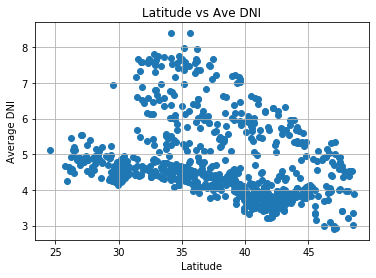

In [13]:
plt.scatter(combined_data["Lat"], combined_data["Ave DNI"])
plt.title('Latitude vs Ave DNI')
plt.xlabel('Latitude')
plt.ylabel('Average DNI')
plt.grid()
# plt.savefig('../output_data/Lat_vs_Ave_DNI.png')

## Latitude vs. Ave GHI Plot

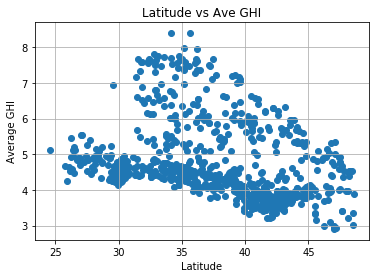

In [14]:
plt.scatter(combined_data["Lat"], combined_data["Ave GHI"])
plt.title('Latitude vs Ave GHI')
plt.xlabel('Latitude')
plt.ylabel('Average GHI')
plt.grid()

## Latitude vs. Ave Lat Tilt Plot

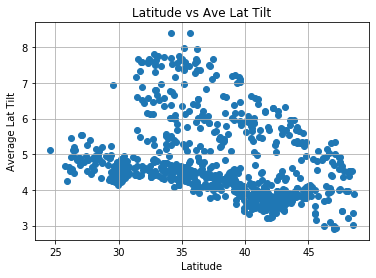

In [15]:
plt.scatter(combined_data["Lat"], combined_data["Ave Lat Tilt"])
plt.title('Latitude vs Ave Lat Tilt')
plt.xlabel('Latitude')
plt.ylabel('Average Lat Tilt')
plt.grid()

## Linear Regression

In [ ]:
# # OPTIONAL: Create a function to create Linear Regression plots
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=north[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Northern Latitudes vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()



In [ ]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# south=weather_data.loc[(weather_data['Lat']<=0)]
# xvalue=south['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=south[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Southern Latitudea vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()

In [ ]:
# # Create Northern and Southern Hemisphere DataFrames
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvaluen=north['Lat']
# south=weather_data.loc[(weather_data['Lat']<0)]
# xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# # plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# # yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# # north=weather_data.loc[(weather_data['Lat']>=0)]
# # xvalue=north['Lat']

    
# yvalue=north['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Northern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Max_Temp.png')
# plt.show()

# print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Southern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
# plt.show()

# print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=north['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Northern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Southern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=north['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Northern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
# plt.show()

# print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Southern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
# plt.show()

# print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# yvalue=north['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# yvalue=south['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')
